In [1]:
# import necessary libraries


import pandas as pd                     # for data manipulation
import numpy as np                           # (Numerical Python) for multi-dimensional arrays and matrices, and high-level numerical calculations
import sklearn as sk                 # for model creation - which we do not do in this assignment
from sklearn.impute import SimpleImputer    # for data imputation
import matplotlib.pyplot as plt           # for creating visulizations and plotting graphs
import seaborn as sns                # data visualization library built on top of matplotlib 
import os                    # reading and writing to the file system
import regex as re                      # handling regular expression
import missingno as msno         # data nullity correlation and missing data visualization <verify this !>
from sklearn.model_selection import train_test_split            # for cross validation 
from sklearn.linear_model import LogisticRegression             # Using library for filling in categorical missing values
from sklearn.preprocessing import OneHotEncoder         # converting categorical data to numerical
from sklearn.pipeline import Pipeline           # pipeline
from sklearn.preprocessing import LabelEncoder      # encoding categorical data to numerical
from sklearn.feature_extraction.text import CountVectorizer     # creating vocabulary
from wordcloud import WordCloud     # visualizing vocabulary
from sklearn.compose import ColumnTransformer


<h1  style="text-align: center" class="list-group-item list-group-item-action active"><font color="green"> [A] Preliminary Observations</font></h1><a id = "1" ></a>

In [2]:
# Loading data in a pandas datafrma

os.chdir("/Users/uni/Documents/MMA")
df = pd.read_csv("sis_data.csv")

In [3]:
df.shape

(284, 19)

We can see that there are:

- 284 Records (284 rows) 
-  19 Features (19 columns)

In [4]:
# Checking dtype of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 19 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                         --------------  ----- 
 0   ID                                                                                                                             282 non-null    object
 1   Name                                                                                                                           284 non-null    object
 2   Location                                                                                                                       270 non-null    object
 3   Grade                                                                                                              

In [5]:
# Observind overall data
df

,ID,Name,Location,Grade,Title,Join\nDate,LWD,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,29-Aug-10,NaN,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,19-Aug-99,NaN,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,08-Apr-07,NaN,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,0,Sally Smith,London,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,0,Ned Shearer,London,Chair,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,Cami Wiegand �,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Economics and Business,Economics,"South East European University, Macedonia","Bachelor( Political Science), Masters( Europea...","intro to Economics, EU laws and Regulations, O...","Economics, policy and general business course",9 years professional experience+ 11 years teac...,Researcher
280,0,Alan Sheely �,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Management Science,Marketing,"University of Economics, Krakow, Poland","Bachelor( Foreign Languages), Masters( America...","Marketing Management, Marketing Research, Cons...",Marketing,16 years professional( consulting) experience ...,Researcher/Curriculum Development
281,0,Allison Gall �,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D,HRM,"University of Mauritus, Mauritus","Bachelor( Economics), Masters( Industrial Rela...","HRM, SHRM, Performance and Reward Mgt, Researc...",HRM,14 years professional experience + 9 years tea...,Certification/Researcher
282,0,Myles Tena �,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D,Economic Sociology,"University of San Paulo, Brazil","Bachelor(Economics), Masters( Industrial Engin...",Economics and Management,"Financial Mgt, Project Mgt, Entrepreneurial Fi...",12 years professional experience + 11 years te...,Researcher


### Initial Observations:

We can see that there are multiple issues with this dataset. 

__Null values:__
    First look at the dataset tells us there are multiple null values 'NaN' in 'LWD' column. There is a need to thoroughly explore the dataset for the rest of 'NaN' values.

__Data accuracy and consistency issues:__
    The values in <font color=blue size = 2.5>'ID'</font> column are not consistent i.e. some are alphanumeric values like _'LT9210743'_ and some are simply _'0'_ which violates the accuracy standard of the dataset. 

__Data uniformity issues:__
    The uniformity standard is violated since most column names are camel-cased whereas some are capitalized like <font color=blue size = 2.5>'MAJOR TEACHING FIELD'</font>. 

**Noisy Data:**
    The special character _'�'_ in column <font color=blue size = 2.5>'Name'</font> points towards noisy data. The column name 'Divison' is misspelled, whereas some column names like <font color=blue size = 2.5>'Highest\nQualification\nLevel'</font> have unexpected line break _'\n'_ which will cause issues during data processing. The column name <font color=blue size = 2.5>'DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications'</font> has several issues, like 
- it is a mixture of capitalized and camel-case words 
- the part _'Five Years Work Experience'_ clearly refers to a record and not a feature, 
- spelling mistake in _'CRITIERA'_, 
- and finally and most importantly - the overall column name is not sufficiently clear i.e. it is ambiguous as to what kind of data the column represents. 

Let's address these issues feature/column-wise and also check if there are more issues.

<h1  style="text-align: center" class="list-group-item list-group-item-action active"><font color="green">[B] Data Exploration followed by Data Cleaning</font></h1><a id = "1" ></a>

This section uses abbreviations for better readability:
- Data Cleaning: <font color=brown size=2.5>_DC_</font>
- Data Exploration: <font color=brown size=2.5>_DE_</font>

#### <font color=brown> [DC] Before we go further, let's make the **column names** uniform. </font>

In [6]:
# Renaming columns to align case

df = df.rename(columns={'Join\nDate':'Join Date','Divison':'Division' , 'Highest\nQualification\nLevel':'Highest Qualification Level', 'MAJOR TEACHING FIELD':'Major Teaching Field'})

# After going through recoards in column 17, we can deduce that this column contains information about the overall experience of management/faculty members and any additional certifications they have
# Hence renaming column to 'Document Experience and Certifications'

df = df.rename(columns={'DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications':'Document Experience and Certifications'})

df.head()

,ID,Name,Location,Grade,Title,Join Date,LWD,Type,Division,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,29-Aug-10,NaN,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,19-Aug-99,NaN,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,08-Apr-07,NaN,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,0,Sally Smith,London,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,0,Ned Shearer,London,Chair,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development


#### <font color=brown>[DC] As next step, let's remove the noisy data i.e. the special character from the dataframe throughout. </font>

In [7]:
# Removing special character using regular expression

df = df.replace('�', '',regex=True)
df.tail()

,ID,Name,Location,Grade,Title,Join Date,LWD,Type,Division,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
279,0,Cami Wiegand,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Economics and Business,Economics,"South East European University, Macedonia","Bachelor( Political Science), Masters( Europea...","intro to Economics, EU laws and Regulations, O...","Economics, policy and general business course",9 years professional experience+ 11 years teac...,Researcher
280,0,Alan Sheely,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Management Science,Marketing,"University of Economics, Krakow, Poland","Bachelor( Foreign Languages), Masters( America...","Marketing Management, Marketing Research, Cons...",Marketing,16 years professional( consulting) experience ...,Researcher/Curriculum Development
281,0,Allison Gall,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D,HRM,"University of Mauritus, Mauritus","Bachelor( Economics), Masters( Industrial Rela...","HRM, SHRM, Performance and Reward Mgt, Researc...",HRM,14 years professional experience + 9 years tea...,Certification/Researcher
282,0,Myles Tena,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D,Economic Sociology,"University of San Paulo, Brazil","Bachelor(Economics), Masters( Industrial Engin...",Economics and Management,"Financial Mgt, Project Mgt, Entrepreneurial Fi...",12 years professional experience + 11 years te...,Researcher
283,0,Dessie Burruss,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D in Public Policy and Administration,Management and Financial Mgt,"Virginia Commonwealth University, USA","Bachelor( Civil Engineering), Masters(Civil En...","Leadership, Organizational Design and Behaviou...",Finance and Management,16 years professional experience +11 year teac...,Researcher


#### <font color=brown>[DE] Now let's have an overview of the number of categories / unique items in each column </font>

Unique items in ID : 243
Unique items in Name : 282
Unique items in Location : 16


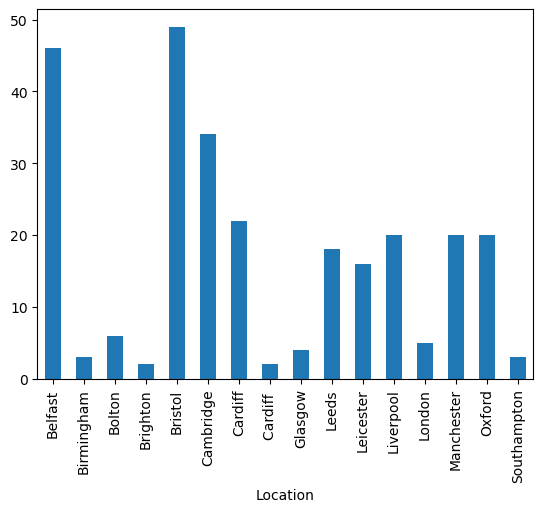

Unique items in Grade : 2


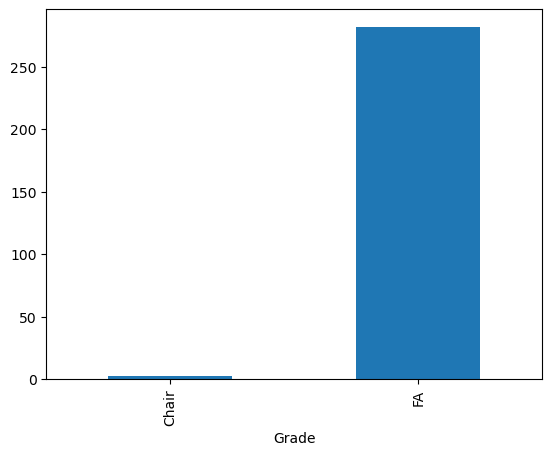

Unique items in Title : 12


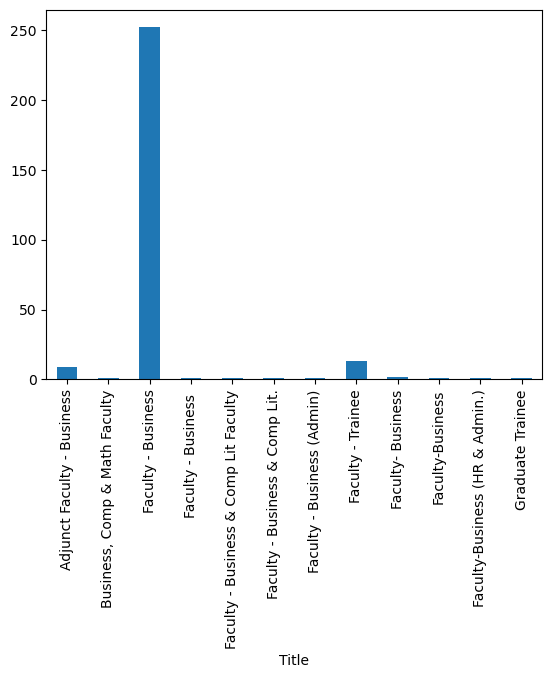

Unique items in Join Date : 143
Unique items in LWD : 2


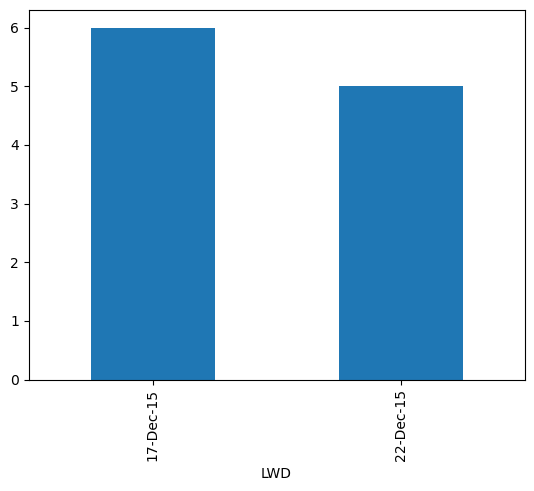

Unique items in Type : 1


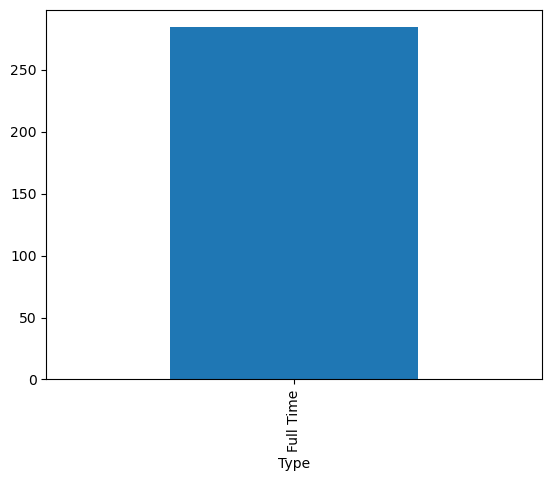

Unique items in Division : 1


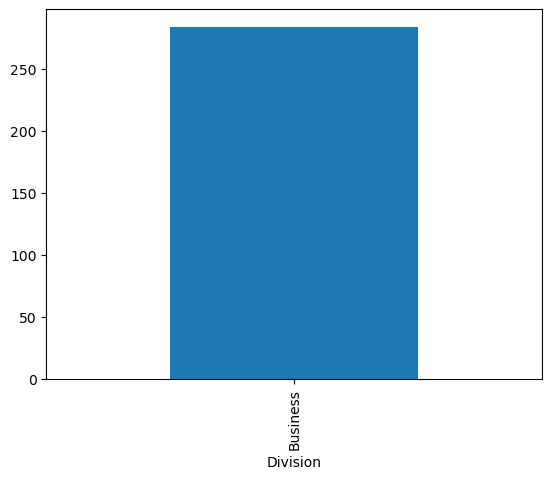

Unique items in Reports To : 15


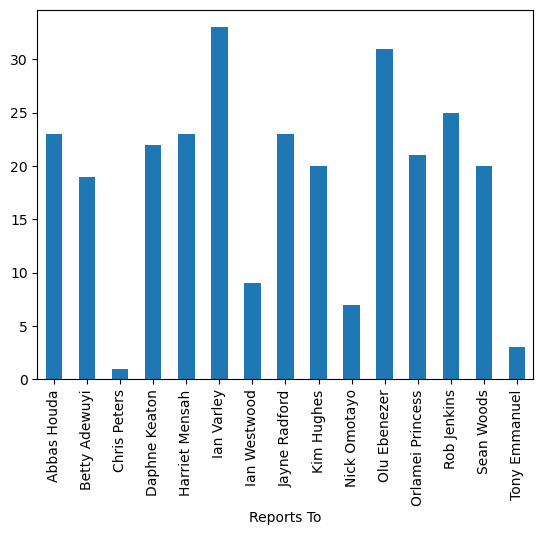

Unique items in Highest Qualification Level : 18


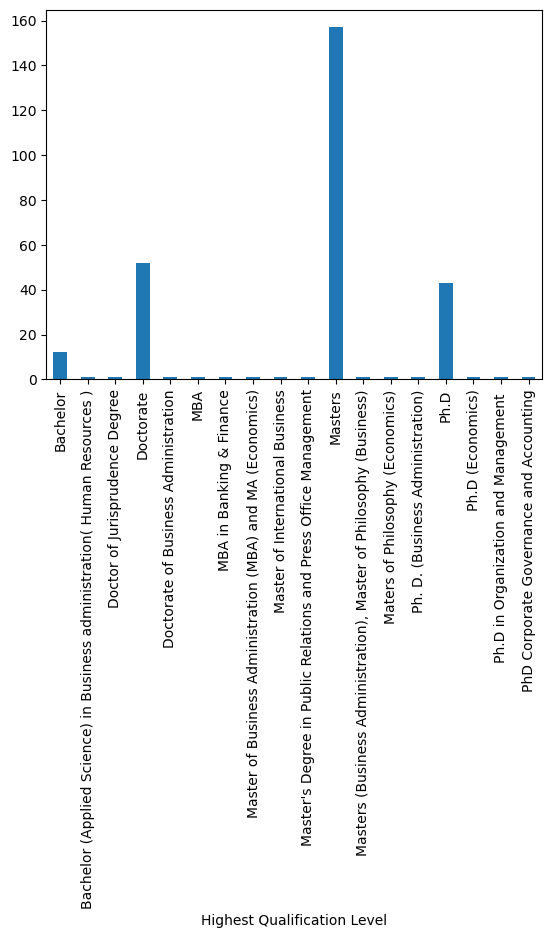

Unique items in Highest Qualification : 59
Unique items in Major : 115
Unique items in University : 214
Unique items in All Qualifications from Profile : 262
Unique items in Courses Taught- Term 201510 : 269
Unique items in Major Teaching Field : 143
Unique items in Document Experience and Certifications : 208
Unique items in Criteria : 8


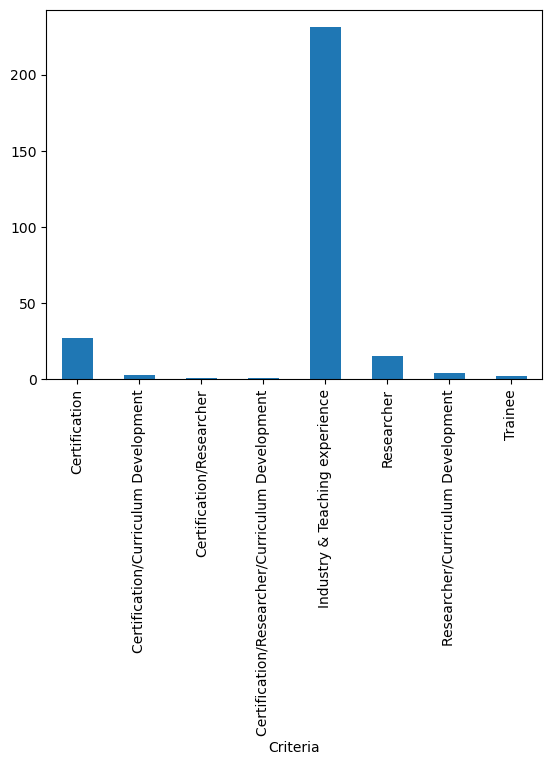

In [8]:
# Check which columns are 'object'

obj_columns = df.select_dtypes(include = ['object']).columns.values
obj_columns

for i in obj_columns:
    print('Unique items in', i,':',len(df[i].value_counts()))
    if(len(df[i].value_counts())<25):
        df.groupby(df[i]).size().plot.bar()
        plt.show()

We see a variety of columns here. For ease of readability, they are listed below:

- Unique items in ID : 243
- Unique items in Name : 282
- Unique items in Location : 16
- Unique items in Grade : 2
- Unique items in Title : 12
- Unique items in Join Date : 143
- Unique items in LWD : 2
- Unique items in Type : 1
- Unique items in Divison : 1
- Unique items in Reports To : 15
- Unique items in Highest Qualification Level : 18
- Unique items in Highest Qualification : 59
- Unique items in Major : 115
- Unique items in University : 214
- Unique items in All Qualifications from Profile : 262
- Unique items in Courses Taught- Term 201510 : 269
- Unique items in Major Teaching Field : 143
- Unique items in Document Experience and Certifications : 208
- Unique items in Criteria : 8



Some columns like <font color=blue size=2.5>ID</font> and <font color=blue size=2.5>Name</font> have more than 250 unique records. To streamline the analysis, the code has a condition of plotting only those columns that have less than 25 unique values, and hence <font color=blue size=2.5>IDs</font>, <font color=blue size=2.5>Names,</font> <font color=blue size=2.5>Join Date</font> and others are not plotted.

Regarding the columns that are plotted, their categories range from 1 to 18. The "constant" columns (GG, 2025) i.e. the columns with only 1 category are redundant and do not contribute to the variance of overall dataset and hence could be dropped.



#### <font color=brown> [DC] Dropping constant columns: Type, Division </font>

In [9]:
df.drop(['Type', 'Division'], axis=1, inplace=True)
df.head()

,ID,Name,Location,Grade,Title,Join Date,LWD,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,29-Aug-10,NaN,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,19-Aug-99,NaN,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,08-Apr-07,NaN,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,0,Sally Smith,London,FA,Faculty - Business,14-Aug-16,NaN,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,0,Ned Shearer,London,Chair,Faculty - Business,14-Aug-16,NaN,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development


### <font color=brown> [DE] Now let's check the dataset for null values </font>

We know from our initial observations that the dataset has multiple null values.



Let us visualize the missing information in the dataset.

In [10]:
# Re-iterating the number of records and number of columns

df.shape

(284, 17)

<Axes: >

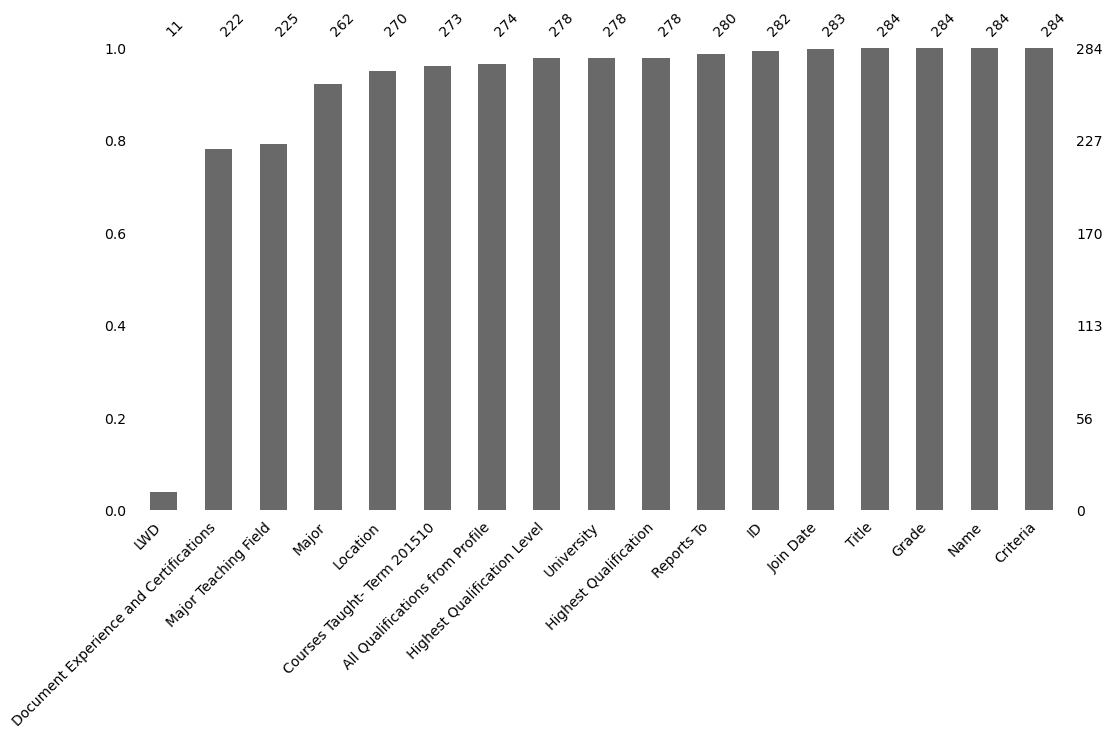

In [11]:
msno.bar(df,figsize=(12,6), fontsize=10, sort="ascending")

The percentage of missing values range from approximately 4% to 21% (excluding the column <font color=blue size=2.5>LWD</font>). If the missing values are more than 15%, then it could be problematic for the analysis going forward (Jafari, 2022). As a general rule of thumb, it is recommended to not fill in more than 5% of the values in a dataset (Buckley, 2017). 

From our earlier data exploration of categories in each column, we know that <font color=blue size=2.5>LWD</font> column has only 2 unique values. Adding missing values in this column does not add any variance to the dataset and can make it biased. Also since more than 90% of the values are missing in LWD columns, it can be dropped (ApX, no date).


As the next step, let's check the missing values across the dataset and whether there is a pattern in the missing data. 

We visualize it using a matrix plot.

<Axes: >

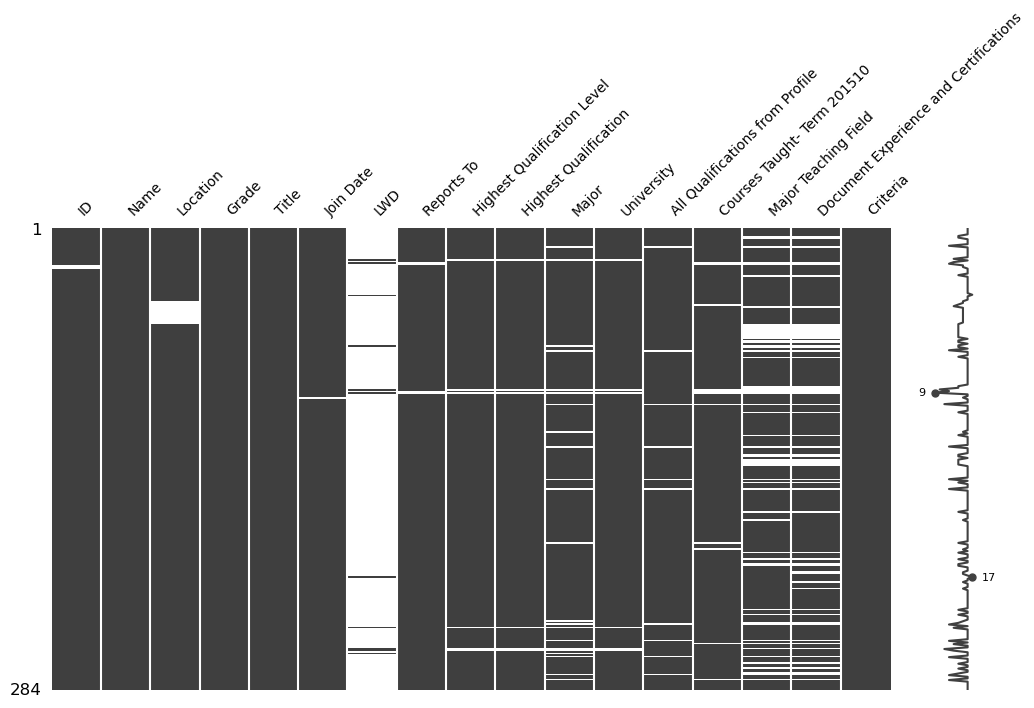

In [12]:
msno.matrix(df,figsize=(12,6), fontsize=10)

All the conclusions in this initial visual over will be explored further in this assignment. The white spaces in the matrix graph denote the missing values from rows. 

There seems to be a relationship between missing values in column <font color=blue size=2.5>ID</font> with the ones containing qualification details. This points towards MAR. 

We see that the absence of <font color=blue size=2.5>Major teaching Field</font> is accompanied by the absence of overall experince. This might indicate another MAR case. Further exploration is required.

The missing values in column <font color=blue size=2.5>'Location'</font> are MCAR

There also seems to be missing values in multiple columns corresponding to existing <font color=blue size=2.5>LWD</font>. Here we have a choice to delete the entire record i.e. the rows which have <font color=blue size=2.5>LWD</font> or drop the column <font color=blue size=2.5>LWD</font> as we concluded earlier. But we stick to our original decision to drop this column.



<Axes: >

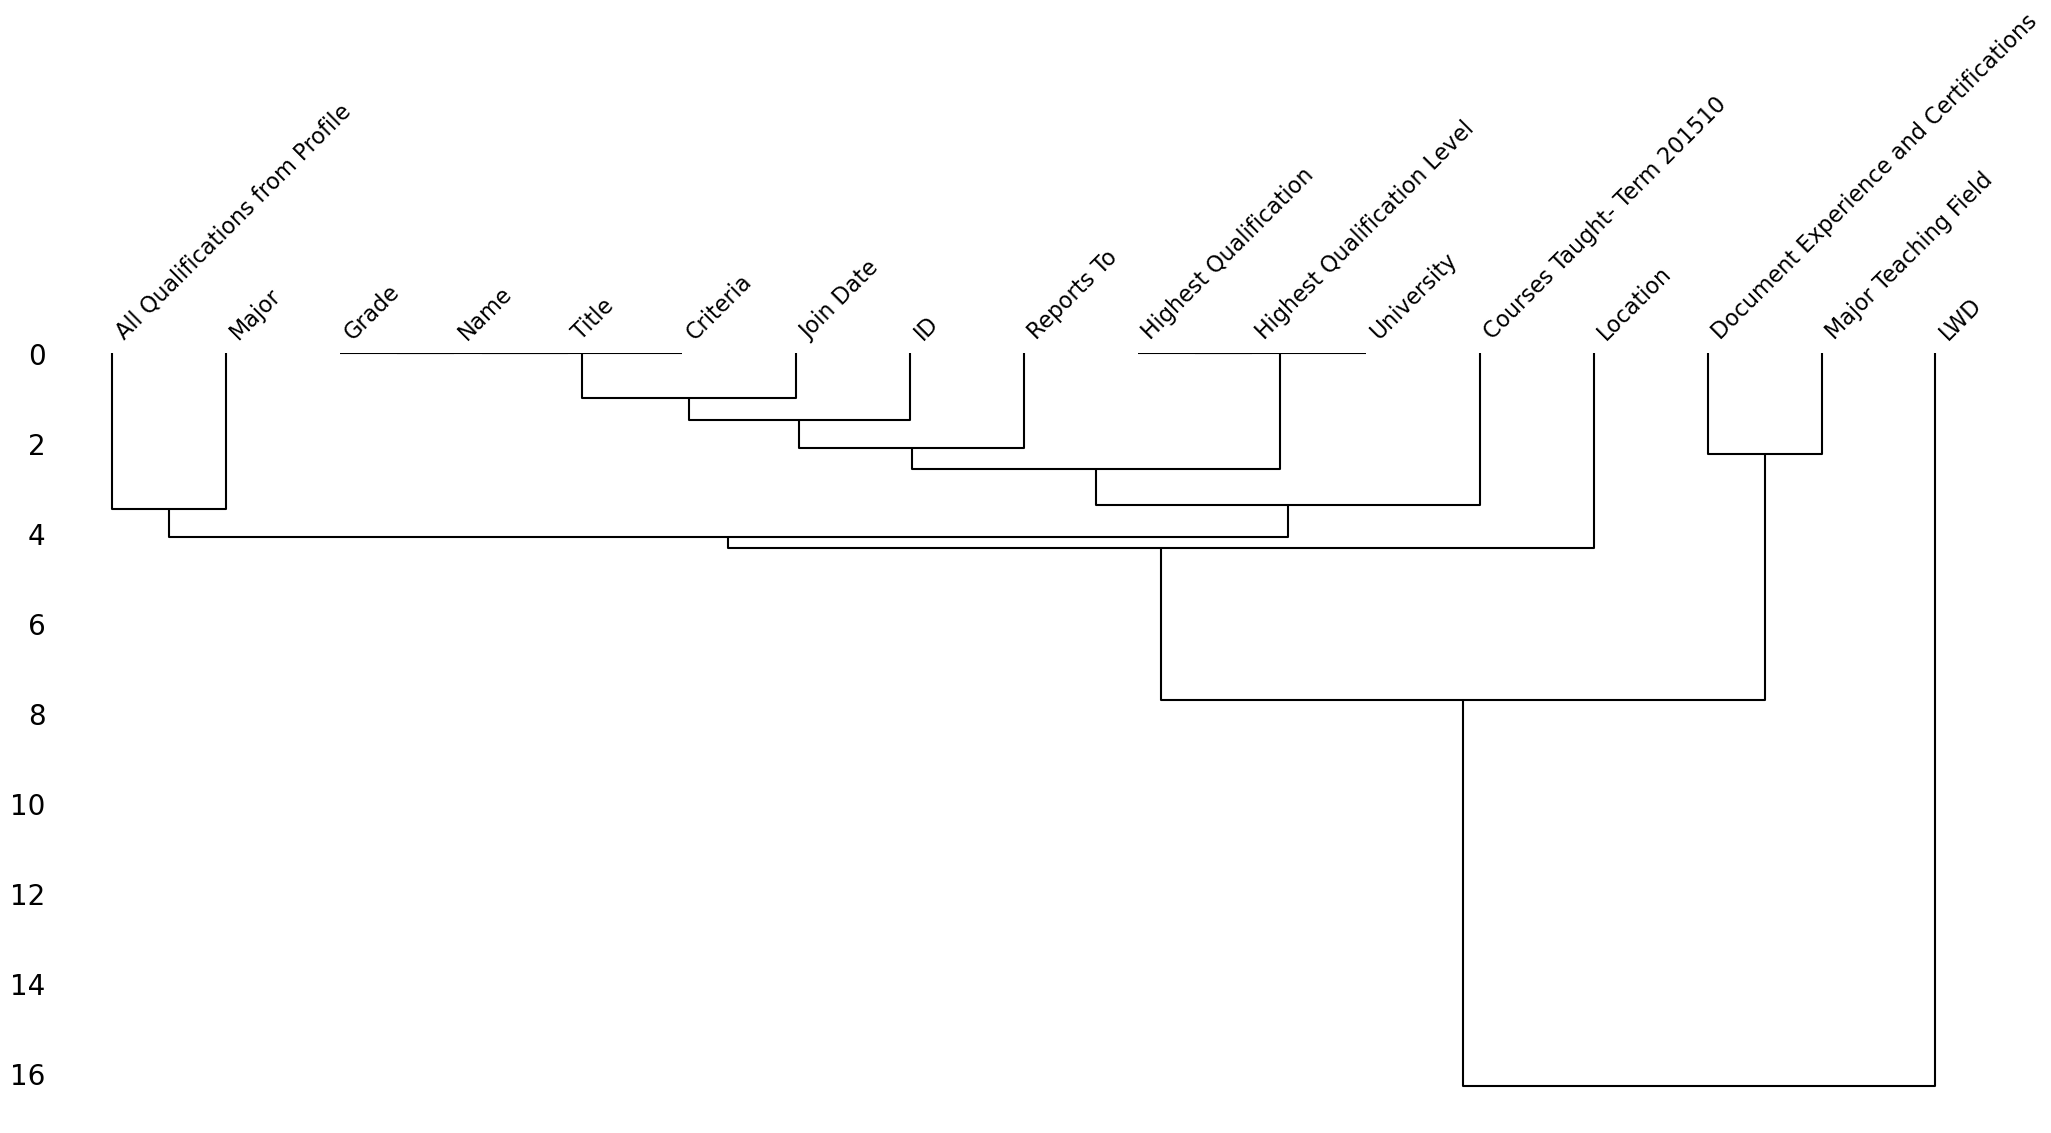

In [13]:
msno.dendrogram(df)

Here we see the most inter-realted columns/ features. The closer the features are to 0, the more related they are.

#### <font color=brown> [DC] Filling in missing values: ID </font>

In [14]:
# Dropping column 

df.drop(['LWD'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of             ID             Name   Location  Grade               Title  \
0    LT9210743       Jim Hunter     London     FA  Faculty - Business   
1    LT9001784       Jose Nadal     London     FA  Faculty - Business   
2    LT9062955    Pierre Cornet     London     FA  Faculty - Business   
3            0      Sally Smith     London     FA  Faculty - Business   
4            0     Ned Shearer      London  Chair  Faculty - Business   
..         ...              ...        ...    ...                 ...   
279          0    Cami Wiegand   Cambridge     FA  Faculty - Business   
280          0     Alan Sheely   Cambridge     FA  Faculty - Business   
281          0    Allison Gall   Cambridge     FA  Faculty - Business   
282          0      Myles Tena   Cambridge     FA  Faculty - Business   
283          0  Dessie Burruss   Cambridge     FA  Faculty - Business   

     Join Date     Reports To Highest Qualification Level  \
0    29-Aug-10    Abbas Houda   

In [15]:
# Defining a function to find null values as we cehck each column

def find_null_values(col):
    null_values = df[col.isnull()]
    return null_values


In [16]:
null_ids = find_null_values(df['ID'])
null_ids

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
23,NaN,Kojo Mensah,Liverpool,FA,Faculty - Business,14-Aug-16,Abbas Houda,Ph.D,Ph.D in Business Administration,Economics& Management,"Jackson State University, USA","Bachelor( Economics & Sociology), Masters(Econ...","Operations Mgt, Economics, Financial instituti...",Economics & Mgt,9 years professional experience + 17 years tea...,Industry & Teaching experience
24,NaN,Fettoum Alli,Liverpool,FA,Faculty - Business,14-Aug-16,Abbas Houda,Ph.D,Ph.D in Business Administration,Finance,"University of Paris Sud 11, France","Bachelor(Finance), Masters( international Fina...","Finance Accounting, Financial Mgt, Corporate F...",Finance,3 years professional experience + 12 years tea...,Industry & Teaching experience


In [17]:
# Checking rows with ID = 0

df_ids = df[df['ID'].isin(['0'])]
df_ids.head()


,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
3,0,Sally Smith,London,FA,Faculty - Business,14-Aug-16,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,0,Ned Shearer,London,Chair,Faculty - Business,14-Aug-16,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development
49,0,Bobby Mc Pherson,NaN,FA,Faculty - Business,14-Aug-16,Abbas Houda,Ph.D,Ph.D in Economics,Economics,"Michigan State University, USA","Bachelor(Economics), Masters( Economics)","Micro and Macro Economics, Monetary Theory, An...",Economics,28 years professional experience + 3 years tea...,Industry & Teaching experience
50,0,Natasha MC Vey,NaN,FA,Faculty - Business,14-Aug-16,Ian Varley,Ph.D,Ph.D in Economics,Economics,"University of Nebraska,USA","Bachelor(Economics), Masters( Economics)","Micro and Macro Economics, Business Stastics, ...",Economics,5 years professional experience + 9 years teac...,Industry & Teaching experience
51,0,Roxanne Middleditch,NaN,FA,Faculty - Business,14-Aug-16,Ian Varley,Ph.D,PhD in Business Administration,HRM and tourism,"Girne American University, Cyprus","Bachelor (international Relations), Masters( I...","HRM, International Business, TQM, Service Qual...","HRM, Quality and Tourism",5 years professional experience +15 years teac...,Researcher


<Axes: xlabel='ID'>

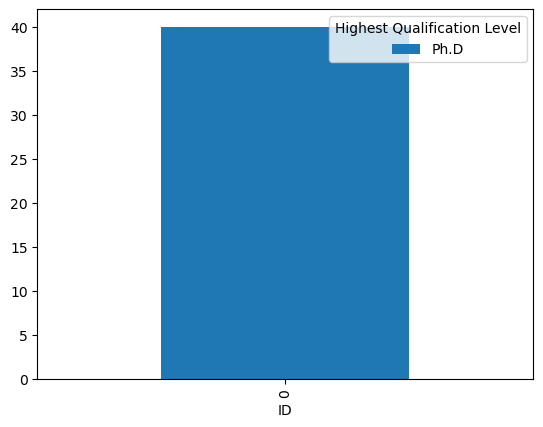

In [18]:
ct_id_hql = pd.crosstab(index=df_ids['ID'],columns=[df_ids['Highest Qualification Level']])
ct_id_hql.plot.bar()

We observe that when <font color=blue size=2.5>ID </font> = 0, the highest qualification level is always Ph.D. This points towards MAR case.

In [19]:
df['ID'].unique()

array(['LT9210743', 'LT9001784', 'LT9062955', '0', 'LT9329000',
       'LT9308851', 'LT9231337', 'LT9280242', 'LT9053151', 'LT9305239',
       'LT9330949', 'LT9283220', 'LT9278625', 'LT9000017', 'LT9001326',
       'LT9216378', 'LT9303928', 'LT9251383', 'LT9280999', 'LT9305042',
       'LT9002264', 'LT9329002', nan, 'LT9284483', 'LT9303960',
       'LT9299279', 'LT9304864', 'LT9305872', 'LT9281224', 'LT9237572',
       'LT9251121', 'LT9251119', 'LT9284377', 'LT9285255', 'LT9216320',
       'LT9254788', 'LT9211421', 'LT9003154', 'LT9210954', 'LT9001556',
       'LT9299139', 'LT9284356', 'LT9276009', 'LT9004065', 'LT9302314',
       'LT9000673', 'LT9308377', 'LT9305756', 'LT9308852', 'LT9251132',
       'LT9305962', 'LT9299170', 'LT9259292', 'LT9276937', 'LT9301620',
       'LT9211589', 'LT9216404', 'LT9012184', 'LT9305841', 'LT9252175',
       'LT9304807', 'LT9307988', 'LT9214849', 'LT9331060', 'LT9100850',
       'LT9272822', 'LT9214746', 'LT9252098', 'LT9133995', 'LT9258148',
       '

A few observations here - the <font color=blue size=2.5>ID</font> column follows a general convention i.e. all values begin with a prefic _'LT'_. But there are also some values that begin with a number e.g. 950001122. Also <font color=blue size=2.5>ID</font> column has only two _'NaN'_ values. Form our earlier analysis, and also from this list of unique values above, we can see that there are certain records with <font color=blue size=2.5>ID</font>=0. 

The data cleaning steps for this will be:
- In order to maintain the data integrity and uniqueness of the identification column, we will use a placeholder value 'UNKNOWN' instead of populating predicted values. 
- Replace NaN and '0' values with string 'UNKNOWN'.
- Add a prefix _'LT'_ to all IDs that begin with a number to maintain the uniformity of data.

In [20]:
# Checking number of rows with ID = 0

df[df['ID'].isin(['0'])].count()

ID                                        40
Name                                      40
Location                                  30
Grade                                     40
Title                                     40
Join Date                                 39
Reports To                                40
Highest Qualification Level               40
Highest Qualification                     40
Major                                     40
University                                40
All Qualifications from Profile           40
Courses Taught- Term 201510               40
Major Teaching Field                      39
Document Experience and Certifications    40
Criteria                                  40
dtype: int64

Re-iterating the earlier observations here:
- There are 243 unique values in <font color=blue size=2.5>ID</font>
- There are 2 null values in <font color=blue size=2.5>ID</font>
- There are 40 records with value '0'

In [21]:
# Filling missing values NaN

df['ID'] = df['ID'].fillna('UNKNOWN')

<Axes: ylabel='ID'>

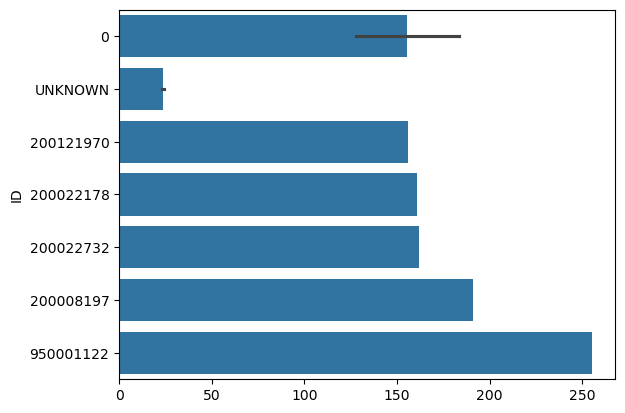

In [22]:
# Visualize IDs that do not start with prefix 'LT'

non_lt_ids = df[~df['ID'].str.startswith('LT')]
sns.barplot(non_lt_ids['ID'])

In [23]:
# Ensuring data uniformity by appending prefix 'LT'

df['ID'] = np.where(
    df['ID'] == '0',           
    'UNKNOWN',               
    np.where(
        df['ID'].str.startswith('LT'),   
        df['ID'],                        
        'LT' + df['ID']                 
    )
)

Verifying cleaned data:

In [24]:
find_null_values(df['ID'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria


In [25]:
df['ID'].unique()

array(['LT9210743', 'LT9001784', 'LT9062955', 'UNKNOWN', 'LT9329000',
       'LT9308851', 'LT9231337', 'LT9280242', 'LT9053151', 'LT9305239',
       'LT9330949', 'LT9283220', 'LT9278625', 'LT9000017', 'LT9001326',
       'LT9216378', 'LT9303928', 'LT9251383', 'LT9280999', 'LT9305042',
       'LT9002264', 'LT9329002', 'LTUNKNOWN', 'LT9284483', 'LT9303960',
       'LT9299279', 'LT9304864', 'LT9305872', 'LT9281224', 'LT9237572',
       'LT9251121', 'LT9251119', 'LT9284377', 'LT9285255', 'LT9216320',
       'LT9254788', 'LT9211421', 'LT9003154', 'LT9210954', 'LT9001556',
       'LT9299139', 'LT9284356', 'LT9276009', 'LT9004065', 'LT9302314',
       'LT9000673', 'LT9308377', 'LT9305756', 'LT9308852', 'LT9251132',
       'LT9305962', 'LT9299170', 'LT9259292', 'LT9276937', 'LT9301620',
       'LT9211589', 'LT9216404', 'LT9012184', 'LT9305841', 'LT9252175',
       'LT9304807', 'LT9307988', 'LT9214849', 'LT9331060', 'LT9100850',
       'LT9272822', 'LT9214746', 'LT9252098', 'LT9133995', 'LT9258

#### <font color=brown> [DC] Filling in missing values: Name </font>

In [26]:
find_null_values(df['Name'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria


In [27]:
df['Name'].unique()

array(['Jim Hunter', 'Jose Nadal', 'Pierre Cornet', 'Sally Smith',
       'Ned Shearer ', 'Bill Lister', 'Phil Woodley', 'Terry Hamilton',
       'Raj Patel', 'Houda Musa', 'Ralph Mellor', 'Max Patley',
       'Seth Ripperton', 'Jane Peters', 'Ishraq Ali', 'Jack Kloss',
       'Rob Nestor', 'Delroy Smith', 'Harry Distel', 'Ludmilla Sirnov',
       'Imran Afridi', 'Vish Singh', 'Mo Abdul', 'Kojo Mensah',
       'Fettoum Alli', 'Alvin Ryder', 'Chris Kotler', 'Merlyn Fernandes',
       'Justina Kelly', 'Mariam Ahmed', 'Donald West', 'Richard Baynor',
       'Juila Demetris', 'Rick Salter', 'Jake Fisher', 'Claudette Pierce',
       'Mark Morrow', 'Piers Southley', 'Malik Owabare', 'Roger Watkins',
       'Boris Meadows', 'Max Rogers', 'Maurice Hedwell', 'Fiona Newby',
       'Amanda Hobson', 'Bilal Khalid', 'Akbar Khan', 'Soriyya Khan',
       'Bobby Mc Pherson', 'Natasha MC Vey', 'Roxanne  Middleditch',
       'Zak Piper', 'June Rayner', 'Sophia Spicer', 'Zoe Spencer',
       'Lorenzo Spo

In [28]:
df['Name'].count()

np.int64(284)

No issues with the column <font color=blue size=2.5>'Name'</font>.

#### <font color=brown> [DC] Filling in missing values: Location </font>

In [29]:
# Cheking for null values

find_null_values(df['Location'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
45,LT9004065,Amanda Hobson,NaN,FA,Faculty - Business,16-Sep-02,Ian Varley,Doctorate,Doctorate in Marketing,Marketing,University of Westminster,Master of Business Administrat (Business Admin...,CSD1023 - The Crime of Smuggling\nBUS4563 - St...,Business Administration/\nMarketing,ICDL\nIRB\nInstructional Skills Workshops (ISW...,Industry & Teaching experience
46,LT9302314,Bilal Khalid,NaN,FA,Faculty - Business,31-Aug-14,Ian Varley,Masters,Master of Commerce,Financial Management,University Of Johannesburg,"Master of Commerce (Financial Management), Bac...",BUS4183 - Corporate Finance\nLSM1003 - Applied...,Business Adminstration/Finance and Investment ...,6 years teaching experience,Industry & Teaching experience
47,LT9000673,Akbar Khan,NaN,FA,Faculty - Business,14-Aug-95,Ian Varley,Masters,Masters in Engineering,Oper. Resch. & Mgt. Info. Sys.,University of Toronto,"Bachelor of Science (Industrial Engineering), ...",NaN,Management Science,"29 years teaching experience, ISO 9001: 2008 I...",Certification
48,LT9308377,Soriyya Khan,NaN,FA,Faculty - Business,18-Feb-15,Ian Varley,Masters,Master of Business Administrat,Financial Management,The University of Hull,"Certificate (), Master of Business Administrat...",LSS2533 - Research Methods\nBUS3903 - Contempo...,NaN,NaN,Industry & Teaching experience
49,UNKNOWN,Bobby Mc Pherson,NaN,FA,Faculty - Business,14-Aug-16,Abbas Houda,Ph.D,Ph.D in Economics,Economics,"Michigan State University, USA","Bachelor(Economics), Masters( Economics)","Micro and Macro Economics, Monetary Theory, An...",Economics,28 years professional experience + 3 years tea...,Industry & Teaching experience
50,UNKNOWN,Natasha MC Vey,NaN,FA,Faculty - Business,14-Aug-16,Ian Varley,Ph.D,Ph.D in Economics,Economics,"University of Nebraska,USA","Bachelor(Economics), Masters( Economics)","Micro and Macro Economics, Business Stastics, ...",Economics,5 years professional experience + 9 years teac...,Industry & Teaching experience
51,UNKNOWN,Roxanne Middleditch,NaN,FA,Faculty - Business,14-Aug-16,Ian Varley,Ph.D,PhD in Business Administration,HRM and tourism,"Girne American University, Cyprus","Bachelor (international Relations), Masters( I...","HRM, International Business, TQM, Service Qual...","HRM, Quality and Tourism",5 years professional experience +15 years teac...,Researcher
52,UNKNOWN,Zak Piper,NaN,FA,Faculty - Business,14-Aug-16,Ian Varley,Ph.D,Ph.D,Managerial Economics/ Business Strategy,National University of Singapore,Bachelor( International Business and Asian Stu...,"International Business, Innovation, strategic ...","Strategic Mgt, Supply chain, Innovation, Marke...",5 years professional experience + 8 years teac...,Researcher
53,UNKNOWN,June Rayner,NaN,FA,Faculty - Business,14-Aug-16,Ian Varley,Ph.D,Ph.D in Business Administration,Management,"Nova Southeastern University, USA","Bachelor( Economics), Masters(Finance)",Finance and Mgt courses,Finance and Management,12 years Professional experience+ 9 years teac...,Industry & Teaching experience
54,UNKNOWN,Sophia Spicer,NaN,FA,Faculty - Business,14-Aug-16,Ian Varley,Ph.D,Ph.D,Finance and Islamic Banking & Finance,International Islamic University< Malaysia,"Bachelor(insurance), Masters( Islamic Law/ Jur...","Islamic Risk Mgt, Islamic Insurance, Islamic F...",Islamic Finance and Islamic law,7 years Teaching Experience + active researcher,Researcher


In [30]:
df.shape

(284, 16)

In [31]:
# Checking for correlation between Location data and University data

cols = [2,10]
df_corr_loc = pd.DataFrame(df)
df_corr_loc = df_corr_loc[df_corr_loc.columns[cols]]
df_corr_loc

,Location,University
0,London,American University of Beirut
1,London,University of Northumbria
2,London,Griffith University
3,London,"The University of Swansea, UK"
4,London,"New York University, USA"
...,...,...
279,Cambridge,"South East European University, Macedonia"
280,Cambridge,"University of Economics, Krakow, Poland"
281,Cambridge,"University of Mauritus, Mauritus"
282,Cambridge,"University of San Paulo, Brazil"


We can see that the university details are not relevant to derive geographic data. Hence we go with imputation technique to fill in missing values.

Since the missing values in <font color=blue size=2.5>'Location'</font> are not related to other features i.e. they are MCAR, we use _SimpleImputer_ 

In [32]:
# Data imputation 

imputer = SimpleImputer(strategy='most_frequent')
df['Location'] = imputer.fit_transform(df[['Location']]).ravel()

In [33]:
# Verifying 

find_null_values(df['Location'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria


Verifying a missing value:

In [34]:
df.iloc[45,:]

ID                                                                                LT9004065
Name                                                                          Amanda Hobson
Location                                                                            Bristol
Grade                                                                                    FA
Title                                                                    Faculty - Business
Join Date                                                                         16-Sep-02
Reports To                                                                       Ian Varley
Highest Qualification Level                                                       Doctorate
Highest Qualification                                                Doctorate in Marketing
Major                                                                             Marketing
University                                                        University of 

#### <font color=brown> [DC] Filling in missing values: Grade </font>

In [35]:
find_null_values(df['Grade'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria


In [36]:
df['Grade'].unique()

array(['FA', 'Chair'], dtype=object)

In [37]:
df['Grade'].count()

np.int64(284)

No issues with this column.

#### <font color=brown> [DC] Filling in missing values: Title </font>

In [38]:
find_null_values(df['Title'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria


No issues with this column.

#### <font color=brown> [DC] Filling in missing values: Join Date </font>

In [39]:
find_null_values(df['Join Date'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
104,UNKNOWN,Nicolas Caisip,Bristol,FA,Faculty - Business,NaN,Nick Omotayo,Ph.D,Ph.D in Management Sciences,HRM,"University of Tunis, Tunisia","Bachelor(Finance), Masters( MBA)","Introduction to HRM, Performance Mgt, HR Strat...",HRM,3 years professional experience + 20 years tea...,Industry & Teaching experience


In [40]:
df['Join Date'].unique()

array(['29-Aug-10', '19-Aug-99', '08-Apr-07', '14-Aug-16', '10-Aug-15',
       '08-Mar-15', '14-Aug-11', '02-Feb-14', '20-Mar-11', '12-Nov-14',
       '27-Sep-15', '17-Aug-14', '18-Aug-13', '26-Aug-12', '14-Aug-97',
       '02-Feb-11', '21-Sep-14', '23-Aug-15', '12-Oct-14', '09-Aug-15',
       '15-Apr-14', '22-Sep-14', '28-Sep-14', '18-Jan-15', '04-Nov-13',
       '11-Mar-12', '06-Apr-14', '01-Jun-14', '30-Jan-11', '12-Sep-12',
       '01-Sep-11', '25-Aug-98', '28-Aug-14', '01-Apr-14', '16-Sep-02',
       '31-Aug-14', '14-Aug-95', '18-Feb-15', '05-Jan-15', '19-Jan-15',
       '24-Aug-14', '22-Feb-15', '14-Sep-14', '04-Jan-15', '08-Feb-15',
       '21-Aug-11', '03-Oct-10', '17-Aug-08', '10-Feb-13', '04-Sep-14',
       '12-Aug-99', '26-Aug-09', '01-Feb-15', '16-Aug-09', '12-Aug-89',
       '14-Aug-93', '09-Aug-09', '06-Sep-15', '31-Aug-10', nan,
       '01-Oct-12', '14-Aug-13', '16-Sep-12', '17-Jan-03', '27-Jul-02',
       '12-Aug-06', '10-Oct-12', '11-Jan-92', '11-Aug-96', '26-Aug-14',


In [41]:
# Using forward fill to fill in the missing value

df['Join Date'] = df['Join Date'].ffill()

# Verifying the result

df.iloc[104,:]

ID                                                                                  UNKNOWN
Name                                                                         Nicolas Caisip
Location                                                                            Bristol
Grade                                                                                    FA
Title                                                                    Faculty - Business
Join Date                                                                         14-Aug-16
Reports To                                                                     Nick Omotayo
Highest Qualification Level                                                            Ph.D
Highest Qualification                                           Ph.D in Management Sciences
Major                                                                                   HRM
University                                                     University of Tun

#### <font color=brown> [DC] Filling in missing values: Reports to </font>

In [42]:
# Checking for null values

find_null_values(df['Reports To'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
21,LT9002264,Vish Singh,Liverpool,FA,Adjunct Faculty - Business,23-Aug-15,NaN,Masters,Master of Business Administrat,Human Resource Management,Charles Sturt University,"Bachelor of Business Info. Systems (Business),...",NaN,NaN,NaN,Industry & Teaching experience
22,LT9329002,Mo Abdul,Liverpool,FA,Faculty - Business,09-Aug-15,NaN,Masters,Masters,Human Resource Management,The University of Bolton,"Bachelor (Commerce), Masters (Human Resource M...",NaN,NaN,NaN,Industry & Teaching experience
100,LT9210710,Kala Jegathjenan,Bristol,FA,Faculty - Business,31-Aug-10,NaN,Masters,MA in Accounting,Accounting,Bowling Green State University,Bachelor in Business Administration (General B...,NaN,NaN,NaN,Industry & Teaching experience
101,LT9303893,James Orr,Bristol,FA,Adjunct Faculty - Business,23-Aug-15,NaN,NaN,NaN,NaN,NaN,"Masters (Finance), Bachelor (Economics)",NaN,NaN,NaN,Industry & Teaching experience


Since there are only 4 missing values, it doesn't make sense to use imputation techniques. 

In [43]:
df['Reports To'].unique()

array(['Abbas Houda', 'Tony Emmanuel', nan, 'Ian Varley', 'Daphne Keaton',
       'Kim Hughes', 'Nick Omotayo', 'Harriet Mensah', 'Orlamei Princess',
       'Rob Jenkins', 'Sean Woods', 'Chris Peters', 'Ian Westwood',
       'Jayne Radford', 'Betty Adewuyi', 'Olu Ebenezer'], dtype=object)

In [44]:
# Finding a correlation between other members belonging to the same 'Major' and their reporting manager

df_corr_rt = df.groupby('Major')['Reports To'].agg(lambda x: list(x))
print('For Human Resource Management:')
print(df_corr_rt.get('Human Resource Management'))
print('For Accounting:')
print(df_corr_rt.get('Accounting'))

For Human Resource Management:
[nan, nan, 'Ian Varley', 'Daphne Keaton', 'Harriet Mensah', 'Orlamei Princess', 'Orlamei Princess', 'Betty Adewuyi']
For Accounting:
['Kim Hughes', nan, 'Harriet Mensah', 'Rob Jenkins', 'Betty Adewuyi', 'Betty Adewuyi', 'Betty Adewuyi']


We can safely assume it is one of these managment members. Since _'Betty Adewuyi'_ is managing members belonging to both HR and Accounting departments, we can fill the missing values with her name.

In [45]:
df['Reports To'] = df['Reports To'].fillna('Betty Adewuyi')

In [46]:
# Verifying a value from NaN row

df.iloc[100,:]

ID                                                                                LT9210710
Name                                                                       Kala Jegathjenan
Location                                                                            Bristol
Grade                                                                                    FA
Title                                                                    Faculty - Business
Join Date                                                                         31-Aug-10
Reports To                                                                    Betty Adewuyi
Highest Qualification Level                                                         Masters
Highest Qualification                                                      MA in Accounting
Major                                                                            Accounting
University                                                   Bowling Green State

#### <font color=brown> [DC] Filling in missing values: Qualification details </font>

We observed from our earlier dendrogram visualization that the missing values in columns with qualification details are related. Let us revisit that matrix, with restricted number of columns this time.

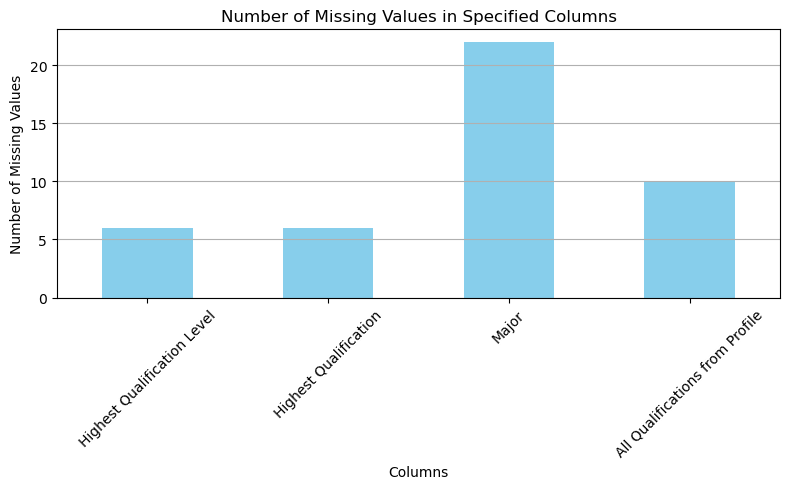

In [47]:

feature_names = ['Highest Qualification Level', 'Highest Qualification', 'Major', 'All Qualifications from Profile']        # Extracting selective features

missing_counts = df[feature_names].isnull().sum()       # counting number of missing values

# Plotting the number of missing values

plt.figure(figsize=(8, 5))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values in Specified Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


We can see that the number of missing values for columns <font color=blue size=2.5>Highest Qualification Level</font> and <font color=blue size=2.5>Highest Qualification</font> are same.

In [48]:
pd.set_option('display.max_colwidth', None)
df_qualification_details = df[['Highest Qualification Level','Highest Qualification','Major', 'All Qualifications from Profile']]
df_qualification_details

,Highest Qualification Level,Highest Qualification,Major,All Qualifications from Profile
0,Masters,Master of Arts,International Affairs,"Bachelor of Science (Communications), Master of Arts (International Affairs), Master of Business Administrat (Business Administration)"
1,Masters,Master of Science,Business Info. Technology,"Bachelor of Arts (Finance), Certificate (Management Accounting), Master of Science (Business Info. Technology)"
2,Masters,Master of Business Administrat,Marketing,"Certificate (Educating/Teaching Adult), Associate Diploma (Business & Management), Master of Business Administrat (Marketing), Bachelor of Commerce (Human Resources), Certificate (Applied Business)"
3,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"Bachelor(finance & Mgt), Masters(MBA & Masters in Business Management)"
4,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"Bachelor( Economics), Masters( Economics and International Business)"
...,...,...,...,...
279,Ph.D,Economics and Business,Economics,"Bachelor( Political Science), Masters( European Union Economics)"
280,Ph.D,Management Science,Marketing,"Bachelor( Foreign Languages), Masters( American Bsuiness Culture & Marketing)"
281,Ph.D,Ph.D,HRM,"Bachelor( Economics), Masters( Industrial Relations & Personnel Mgt)"
282,Ph.D,Ph.D,Economic Sociology,"Bachelor(Economics), Masters( Industrial Engineering)"


<Axes: >

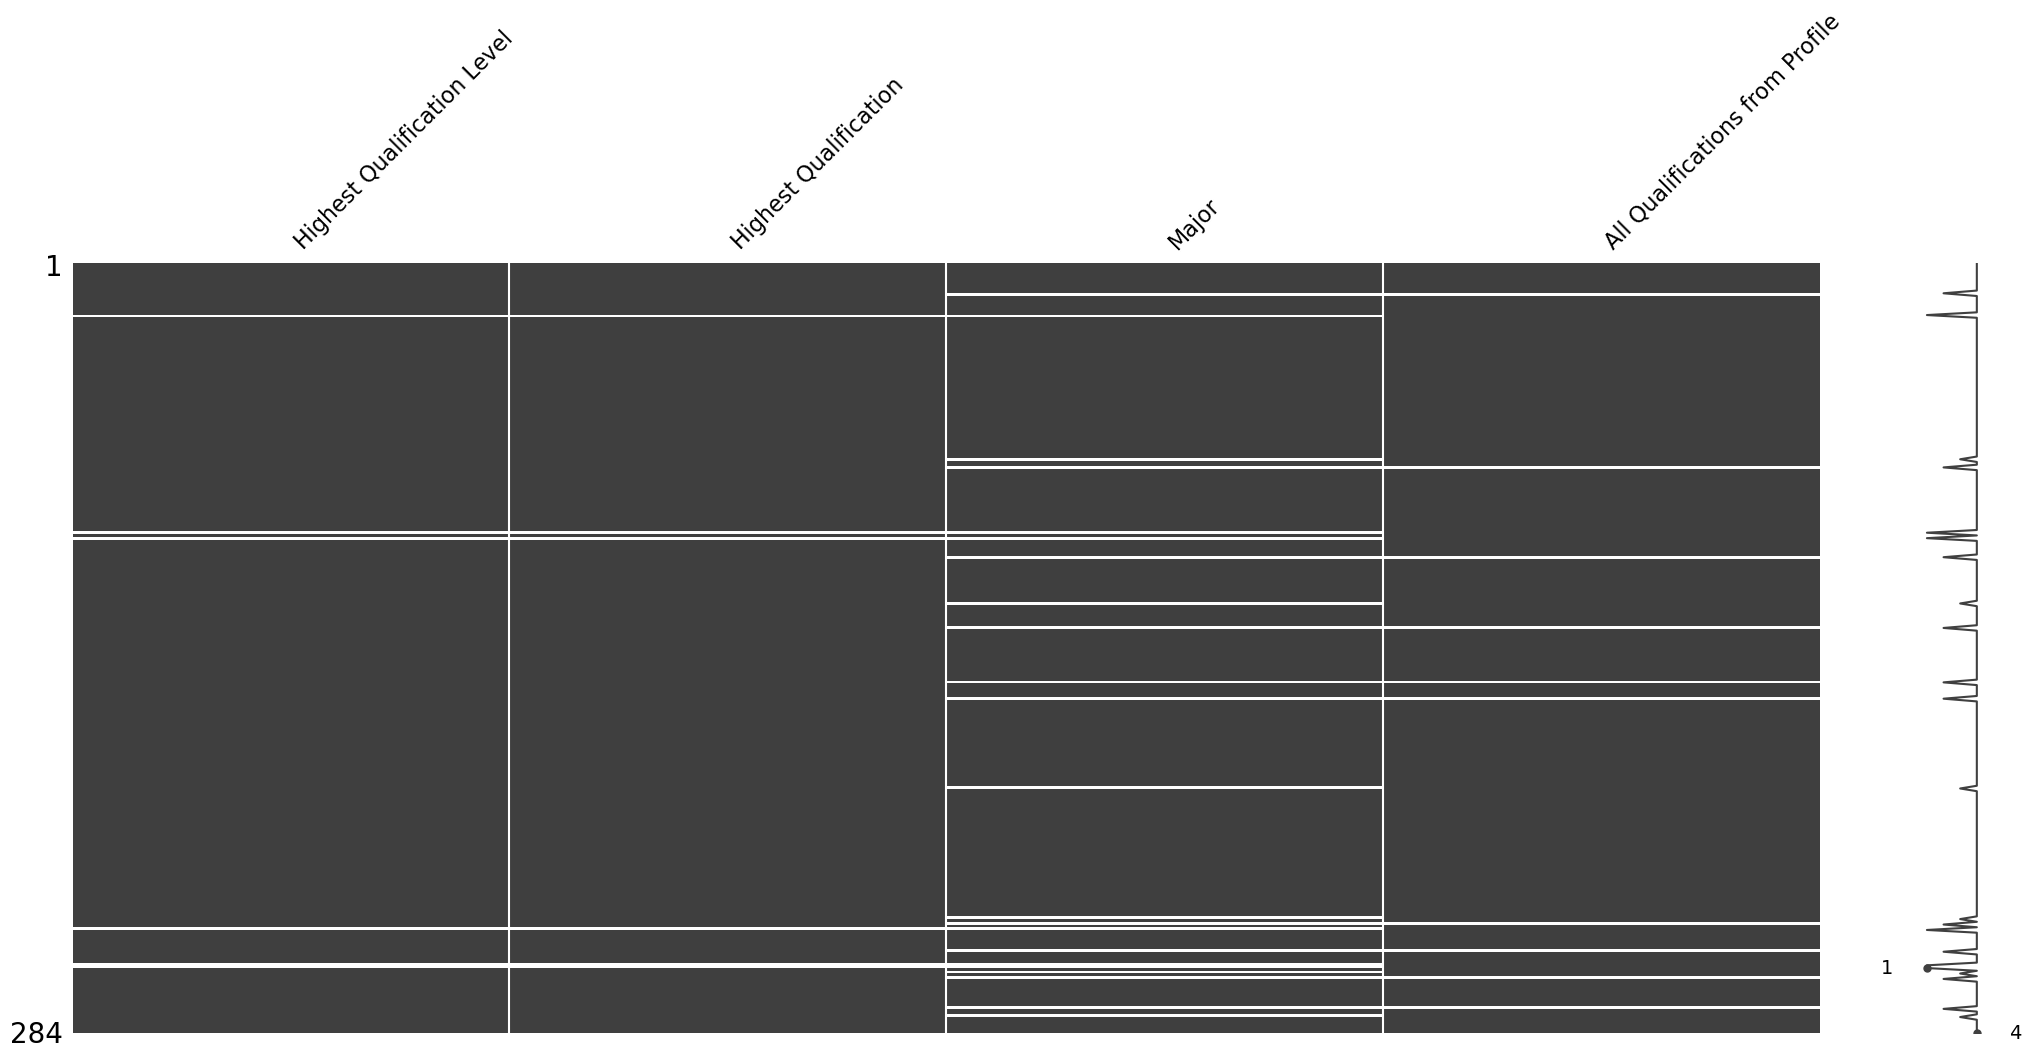

In [49]:
msno.matrix(df_qualification_details)

Corresponding to the missing values in columns <font color=blue size=2.5>'Highest Qualification Level'</font> and <font color=blue size=2.5>'Highest Qualification'</font>, there are calues present in the column <font color=blue size=2.5>'All Qualifications from Profile'</font>. Hence we can derive values for these 2 columns from all qualifications column. Also value for <font color=blue size=2.5>'Highest Qualification Level'</font> can be same as <font color=blue size=2.5>'Highest Qualification'</font> as we see in e.g. row 281 that both columns have value _'Ph.D'_. 

On the other hand, corresponding to the missing values in column <font color=blue size=2.5>'Major'</font>, there are missing values as well in the column <font color=blue size=2.5>'All Qualifications from Profile'</font>. Hence we cannot derive values for <font color=blue size=2.5>'Major'</font> from this column.

Logically, the values from column <font color=blue size=2.5>'Highest Qualification'</font> and <font color=blue size=2.5>'All Qualification from Profiles'</font> must overlap. And we also see from the matrix that for all missing values for <font color=blue size=2.5>'All Qualification from Profiles'</font>, there are existing values in  column <font color=blue size=2.5>'Highest Qualification'</font>. 

So let's begin by filling in missing values in <font color=blue size=2.5>'All Qualification from Profiles'</font>.



##### <font color=brown> [DC] Filling in missing values: All Qualifications from Profile </font>

In [50]:
# Checking for null values

find_null_values(df['All Qualifications from Profile'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
11,LT9330949,Max Patley,Liverpool,FA,Faculty - Business,27-Sep-15,Abbas Houda,Ph.D,Doctorate,NaN,Nagpur University,NaN,BUS4373 - Strategic HRM\nBUS3203 - Strat Mgt Busi Simulation,NaN,NaN,Industry & Teaching experience
75,LT9331060,Roshene Showers,Bristol,FA,Faculty - Business,27-Sep-15,Daphne Keaton,Doctor of Jurisprudence Degree,Doctorate,NaN,"Temple University School of Law, Philadelphia",NaN,BUS2003 - Business and Commercial Law\nBUS4233 - Financial Assets and Markets,NaN,NaN,Industry & Teaching experience
108,LT9328836,Julie Ayliffe,Brighton,FA,Faculty - Business,09-Aug-15,Kim Hughes,MBA,MBA,NaN,University of Western Sydney,NaN,NaN,NaN,NaN,Industry & Teaching experience
134,LT9328927,Tina Adams,Belfast,FA,Faculty - Trainee,09-Aug-15,Orlamei Princess,Master of International Business,Master of International Business,NaN,Hult Internationl Business Sch,NaN,BUS2403 - Innovation & Entrepreneurship\nBUS1403 - Business Ethics and Corporate,NaN,NaN,Industry & Teaching experience
154,LT9329005,Rudo Mutonono,Belfast,FA,Faculty - Business,09-Aug-15,Orlamei Princess,Ph.D in Organization and Management,Doctorate,NaN,Technical University of Varna,NaN,BUS3903 - Contemporary Business\nBUS1203 - Software Apps for Business\nBSD2067 - Business Work Placement\nBUS1303 - Marketing,NaN,NaN,Industry & Teaching experience
160,LT9330711,Alun Day,Belfast,FA,Faculty - Business,03-Sep-15,Rob Jenkins,Master of Business Administration (MBA) and MA (Economics),Master of Business Administration (MBA) and MA (Economics),NaN,"American University-Washington DC, USA and University of Kansas, USA",NaN,BUS2203 - Business Stats for Managers\nBUS4553 - Strategic Supply Chain Managem\nBUS3406 - Work Related Learning\nBUS4513 - Strat Decisions with Mgt Sc,NaN,NaN,Industry & Teaching experience
243,LT9328815,Shon Agena,Leicester,FA,Faculty - Business,09-Aug-15,Betty Adewuyi,PhD Corporate Governance and Accounting,Doctorate,NaN,London South Bank University,NaN,BUS2303 - Financial Management\nBUS4123 - Auditing,NaN,NaN,Industry & Teaching experience
253,LT9328806,Dell Rosenburg,Cambridge,FA,Faculty - Business,09-Aug-15,Betty Adewuyi,Master's Degree in Public Relations and Press Office Management,Master's Degree in Public Relations and Press Office Management,NaN,Universitat Autnoma de Barcelona,NaN,BSD2263 - Socially Responsible Retailing\nBUS1303 - Marketing,NaN,NaN,Industry & Teaching experience
263,LT9328998,Samuel Hilburn,Cambridge,FA,Faculty - Business,09-Aug-15,Olu Ebenezer,Ph. D. (Business Administration),Doctorate,NaN,Case Western Reserve Univ,NaN,BUS4683 - Middle East Devt. & Logistics\nBUS2203 - Business Stats for Managers,NaN,NaN,Industry & Teaching experience
274,LT9328812,Nancie Deemer,Cambridge,FA,Faculty - Business,09-Aug-15,Olu Ebenezer,Doctorate of Business Administration,Doctorate,NaN,Arab Academy for Science and Technology and Maritime,NaN,BUS3003 - Managing People &Organisations\nBUS1303 - Marketing,NaN,NaN,Industry & Teaching experience


In [51]:
df['All Qualifications from Profile'] = df['All Qualifications from Profile'].fillna(df['Highest Qualification'])

In [52]:
# Verifying the result

find_null_values(df['All Qualifications from Profile'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria


##### <font color=brown> [DC] Filling in missing values: Highest Qualification Level and Highest Qualification </font>

In [53]:
# Checking for null values

find_null_values(df['Highest Qualification Level'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
19,LT9280999,Ludmilla Sirnov,Liverpool,FA,Adjunct Faculty - Business,23-Aug-15,Abbas Houda,NaN,NaN,NaN,NaN,"Post Graduate Diploma (Political Science), Masters (International Relation), Diploma (Physical Education), Masters (Business Management)",BUS3903 - Contemporary Business\nBUS1403 - Business Ethics and Corporate,Business Administration/ Management,15 years of professional work in education and business areas; \n5 years of teaching experience,Industry & Teaching experience
99,LT9308826,Jackie Turner,Bristol,FA,Adjunct Faculty - Business,06-Sep-15,Nick Omotayo,NaN,NaN,NaN,NaN,"Bachelor (Hospitality Management), Masters (Business)",NaN,NaN,NaN,Industry & Teaching experience
101,LT9303893,James Orr,Bristol,FA,Adjunct Faculty - Business,23-Aug-15,Betty Adewuyi,NaN,NaN,NaN,NaN,"Masters (Finance), Bachelor (Economics)",NaN,NaN,NaN,Industry & Teaching experience
245,LT9301614,Lizzie Gomez,Leicester,FA,Adjunct Faculty - Business,23-Aug-15,Olu Ebenezer,NaN,NaN,NaN,NaN,"Bachelor (Accounting), Masters (Business)",BSD2033 - Basic Accounting,Finance and Accounting,"More than 5 years work experience, CPA (California, USA)",Industry & Teaching experience
258,LT9280275,Aretha Platter,Cambridge,FA,Adjunct Faculty - Business,23-Aug-15,Olu Ebenezer,NaN,NaN,NaN,NaN,"Masters (Finance), Bachelor (Accounting & Finance), Post Degree Certificate ()",BUS1503 - Accounting for Managers,NaN,NaN,Industry & Teaching experience
259,LT9001889,Concha Britto,Cambridge,FA,Adjunct Faculty - Business,23-Aug-15,Olu Ebenezer,NaN,NaN,NaN,NaN,"Bachelor (English Language & Literature), Masters (Computer Science), Ph.D (Computing)",BUS1203 - Software Apps for Business,"Computing, Business",More than 5 years work experience; certified as an applied instructor in innovations,Industry & Teaching experience


In [54]:
# Re-iterating what was said befor "Logically, the values from column 'Highest Qualification' and 'All Qualification from Profiles' must overlap."
# Fill missing values in 'Highest Qualification Level' based on 'All Qualifications from Profile'

def fill_highest_qualification(row):
    if pd.isnull(row['Highest Qualification Level']):
        if 'Ph.D' in row['All Qualifications from Profile']:
            return 'Ph.D'
        elif 'Masters' in row['All Qualifications from Profile']:
            return 'Masters'
        elif 'Bachelors' in row['All Qualifications from Profile']:
            return 'Bachelors'
    return row['Highest Qualification Level']

# Apply the function to each row

df['Highest Qualification Level'] = df.apply(fill_highest_qualification, axis=1)

Now we fill in missing values for column <font color=blue size=2.5>Highest Qualification</font>.

Since a member can have more than 1 _Masters_ or _Bachelors_ or _Ph.Ds_ - it is safer to fill in the the same values as <font color=blue size=2.5>Highest Qualification Level</font>.

In [55]:
df['Highest Qualification'] = df['Highest Qualification'].fillna(df['Highest Qualification Level'])

In [56]:
# Verifying the value

df.iloc[19,:]

ID                                                                                                                                                                       LT9280999
Name                                                                                                                                                               Ludmilla Sirnov
Location                                                                                                                                                                 Liverpool
Grade                                                                                                                                                                           FA
Title                                                                                                                                                   Adjunct Faculty - Business
Join Date                                                                                                

##### <font color=brown> [DC] Filling in missing values: Major </font>

In [57]:
# Checking for null values

find_null_values(df['Major']).head()

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
11,LT9330949,Max Patley,Liverpool,FA,Faculty - Business,27-Sep-15,Abbas Houda,Ph.D,Doctorate,NaN,Nagpur University,Doctorate,BUS4373 - Strategic HRM\nBUS3203 - Strat Mgt Busi Simulation,NaN,NaN,Industry & Teaching experience
19,LT9280999,Ludmilla Sirnov,Liverpool,FA,Adjunct Faculty - Business,23-Aug-15,Abbas Houda,Masters,Masters,NaN,NaN,"Post Graduate Diploma (Political Science), Masters (International Relation), Diploma (Physical Education), Masters (Business Management)",BUS3903 - Contemporary Business\nBUS1403 - Business Ethics and Corporate,Business Administration/ Management,15 years of professional work in education and business areas; \n5 years of teaching experience,Industry & Teaching experience
72,LT9304807,Charlote Garrod,Bristol,FA,Adjunct Faculty - Business,23-Aug-15,Daphne Keaton,MBA in Banking & Finance,MBA,NaN,Institute of Banking Studies & University of Jordan,"Bachelor (Computer Science), Masters (Banking)",BUS2303 - Financial Management,NaN,NaN,Industry & Teaching experience
75,LT9331060,Roshene Showers,Bristol,FA,Faculty - Business,27-Sep-15,Daphne Keaton,Doctor of Jurisprudence Degree,Doctorate,NaN,"Temple University School of Law, Philadelphia",Doctorate,BUS2003 - Business and Commercial Law\nBUS4233 - Financial Assets and Markets,NaN,NaN,Industry & Teaching experience
99,LT9308826,Jackie Turner,Bristol,FA,Adjunct Faculty - Business,06-Sep-15,Nick Omotayo,Masters,Masters,NaN,NaN,"Bachelor (Hospitality Management), Masters (Business)",NaN,NaN,NaN,Industry & Teaching experience


In [58]:
def fillna_regression(categorical_feature,numerical_feature,target_feature):
    
    df_non_null = df[df[target_feature].notnull()]       # Dropping rows with missing columns
    
    X_non_null = df_non_null[[categorical_feature, numerical_feature]]            # Defining  predictors and target
    y_non_null = df_non_null[target_feature]
   
    X_train, X_test, y_train, y_test = train_test_split(X_non_null, y_non_null, test_size=0.2, random_state=42)       # Split into training and testing data

    cat_features = [categorical_feature]           # initialize categorical and numerical features
    num_features = [numerical_feature]
    
    preprocessor = ColumnTransformer(                                       # Creating preprocessor
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

    pipeline = Pipeline(steps=[                                             # Creating Logistic Regression pipeline
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

    pipeline.fit(X_train, y_train)                  # Fitting the model

    missing_target = df[df[target_feature].isna()]              # create a dataframe with missing values to make predictions
 
    X_missing = missing_target[[numerical_feature, categorical_feature]]

    predicted_missings = pipeline.predict(X_missing)             # Predict the missing target values

    df.loc[df[target_feature].isnull(), target_feature] = predicted_missings            # Assign the predicted values back to the original DataFrame
    return df


In [59]:
# Label encoder to convery categorical values in 'Highest Qualification' to a numberical representation

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Highest Qualification'])

In [60]:
# Here the target clumn is 'Major' i.e. the column in which the missing values are to be filled
# Since the fields relation to qualifications are inter-related as seen from the Dendogram, we use 'All Qualifications from Profile' as the categorical input

fillna_regression('All Qualifications from Profile','category_encoded','Major').count()

/Users/uni/anacondadir/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ID                                        284
Name                                      284
Location                                  284
Grade                                     284
Title                                     284
Join Date                                 284
Reports To                                284
Highest Qualification Level               284
Highest Qualification                     284
Major                                     284
University                                278
All Qualifications from Profile           284
Courses Taught- Term 201510               273
Major Teaching Field                      225
Document Experience and Certifications    222
Criteria                                  284
category_encoded                          284
dtype: int64

In [61]:
find_null_values(df['Major'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria,category_encoded


#### <font color=brown> [DC] Filling in missing values: Major Teaching Field </font>

In [62]:
# Checking for null values

find_null_values(df['Major Teaching Field']).count()

ID                                        59
Name                                      59
Location                                  59
Grade                                     59
Title                                     59
Join Date                                 59
Reports To                                59
Highest Qualification Level               59
Highest Qualification                     59
Major                                     59
University                                56
All Qualifications from Profile           59
Courses Taught- Term 201510               51
Major Teaching Field                       0
Document Experience and Certifications     1
Criteria                                  59
category_encoded                          59
dtype: int64

In [63]:
# Converting string categorical value to numberical value for regression analysis

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Courses Taught- Term 201510'])

In [64]:
# Here the target clumn is 'Major Teaching Field' i.e. the column in which the missing values are to be filled
# Since the fields relation to qualification are inter-related as seen from the Dendogram, we use 'Major' as the categorical input

fillna_regression('Major','category_encoded','Major Teaching Field').count()

/Users/uni/anacondadir/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ID                                        284
Name                                      284
Location                                  284
Grade                                     284
Title                                     284
Join Date                                 284
Reports To                                284
Highest Qualification Level               284
Highest Qualification                     284
Major                                     284
University                                278
All Qualifications from Profile           284
Courses Taught- Term 201510               273
Major Teaching Field                      284
Document Experience and Certifications    222
Criteria                                  284
category_encoded                          284
dtype: int64

In [65]:
find_null_values(df['Major Teaching Field'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria,category_encoded


#### <font color=brown> [DC] Filling in missing values: Courses Taught- Term 201510 </font>

In [66]:
find_null_values(df['Courses Taught- Term 201510']).head()

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria,category_encoded
21,LT9002264,Vish Singh,Liverpool,FA,Adjunct Faculty - Business,23-Aug-15,Betty Adewuyi,Masters,Master of Business Administrat,Human Resource Management,Charles Sturt University,"Bachelor of Business Info. Systems (Business), Post Graduate Diploma (), Certificate (), Master of Business Administrat (Human Resource Management)",NaN,Economics,NaN,Industry & Teaching experience,269
22,LT9329002,Mo Abdul,Liverpool,FA,Faculty - Business,09-Aug-15,Betty Adewuyi,Masters,Masters,Human Resource Management,The University of Bolton,"Bachelor (Commerce), Masters (Human Resource Management), Masters (Marketing)",NaN,Economics,NaN,Industry & Teaching experience,269
47,LT9000673,Akbar Khan,Bristol,FA,Faculty - Business,14-Aug-95,Ian Varley,Masters,Masters in Engineering,Oper. Resch. & Mgt. Info. Sys.,University of Toronto,"Bachelor of Science (Industrial Engineering), Masters in Engineering (Oper. Resch. & Mgt. Info. Sys.)",NaN,Management Science,"29 years teaching experience, ISO 9001: 2008 Internal Auditor, Project Management Professional Certification",Certification,269
99,LT9308826,Jackie Turner,Bristol,FA,Adjunct Faculty - Business,06-Sep-15,Nick Omotayo,Masters,Masters,Business Administration,NaN,"Bachelor (Hospitality Management), Masters (Business)",NaN,Management,NaN,Industry & Teaching experience,269
100,LT9210710,Kala Jegathjenan,Bristol,FA,Faculty - Business,31-Aug-10,Betty Adewuyi,Masters,MA in Accounting,Accounting,Bowling Green State University,"Bachelor in Business Administration (General Business), MA in Accounting (Accounting)",NaN,Accounting,NaN,Industry & Teaching experience,269


In [67]:
df['Courses Taught- Term 201510'] = df['Courses Taught- Term 201510'].fillna('UNKNOWN')

In [68]:
# Cleaning the courses column and converting it to list for ease of accessibility while data processing

for i in range(len(df)):
    cleaned_courses = df.iloc[i]['Courses Taught- Term 201510'].replace('\n', ', ').replace(' ', '').split(',')     # Replace '\n' with ', ' and splitting to get cleaned courses
    df.at[i, 'Courses Taught- Term 201510'] = [course.strip() for course in cleaned_courses if course.strip()]      # Further cleaning and assinging back to original df

df.head()

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria,category_encoded
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,29-Aug-10,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master of Arts (International Affairs), Master of Business Administrat (Business Administration)","[BUS2403-Innovation&Entrepreneurship, BUS2003-BusinessandCommercialLaw, LSG2013-Globalization, Media&Soc, BUS1003-ManagementandLeadership]",Business Administration,"10+ Years Small Business Ownership, 10+ Years SME Consulting, 10+ Years Corporate/Vocational Business Training, 8 Years Teaching Experience",Industry & Teaching experience,84
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,19-Aug-99,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Management Accounting), Master of Science (Business Info. Technology)","[BUS4173-ManagerialAccountingII, BUS4916-IntegrativeIndustryProject, BUS4163-Taxation, BUS4133-ManagerialAccountingI]",Business,"years of teaching experience: 17 years of professional/management experience: 7 Professional Certification: GCMA, ACMA",Certification,169
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,08-Apr-07,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associate Diploma (Business & Management), Master of Business Administrat (Marketing), Bachelor of Commerce (Human Resources), Certificate (Applied Business)","[BUS3903-ContemporaryBusiness, BUS1303-Marketing]",Marketing and Strategic Management,Years of teaching experience: 15\nYears of professional/management experience: 3,Industry & Teaching experience,147
3,UNKNOWN,Sally Smith,London,FA,Faculty - Business,14-Aug-16,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters in Business Management)","[HRM, Organizationalbehaviour, StrategicMgt, projectmgt, Riskmgt]",HRM,6 years professional experience + 6 years teaching and active researcher,Researcher,237
4,UNKNOWN,Ned Shearer,London,Chair,Faculty - Business,14-Aug-16,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and International Business)","[MicroandMacroeconomics, Statistics, IntroductiontoBusiness]",Economics and International Business,1 year professional experience + 24 years teaching and active researcher. Curriculum Development and Accreditation background.,Researcher/Curriculum Development,263


In [69]:
df.drop(['category_encoded'], axis=1, inplace=True)

#### <font color=brown> [DC] Filling in missing values: Document Experience and Certifications </font>

This column contains textual data about experience and relevant certifications. Since we already have all details of the qualifications, we will only extract the total experience from this column.

In [70]:
find_null_values(df['Document Experience and Certifications'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria
5,LT9329000,Bill Lister,Liverpool,FA,Faculty - Business,10-Aug-15,Abbas Houda,Doctorate,Ph.D,Business Administration,Swiss Management Center,"Ph.D (Business Administration), Master of Business Administrat (Business Administration)","[BUS3103-InternatBusiGlobalisation, BUS1303-Marketing, BUS4543-QualityManagementTools, BUS2103-OperationsManagement]",Management,NaN,Industry & Teaching experience
6,LT9308851,Phil Woodley,Liverpool,FA,Faculty - Business (Admin),08-Mar-15,Abbas Houda,Masters,Masters,Health Administration,University of Ottawa,"Bachelor (Accounting & Finance), Masters (Health Administration), Post Degree Certificate (Finance), Post Graduate Certificate (Accounting & Finance), Post Degree Certificate (Training & HR Management)","[BUS2403-Innovation&Entrepreneurship, BUS2303-FinancialManagement, BUS1303-Marketing, BUS2103-OperationsManagement]",General Business,NaN,Industry & Teaching experience
11,LT9330949,Max Patley,Liverpool,FA,Faculty - Business,27-Sep-15,Abbas Houda,Ph.D,Doctorate,Business Administration,Nagpur University,Doctorate,"[BUS4373-StrategicHRM, BUS3203-StratMgtBusiSimulation]",Management,NaN,Industry & Teaching experience
21,LT9002264,Vish Singh,Liverpool,FA,Adjunct Faculty - Business,23-Aug-15,Betty Adewuyi,Masters,Master of Business Administrat,Human Resource Management,Charles Sturt University,"Bachelor of Business Info. Systems (Business), Post Graduate Diploma (), Certificate (), Master of Business Administrat (Human Resource Management)",[UNKNOWN],Economics,NaN,Industry & Teaching experience
22,LT9329002,Mo Abdul,Liverpool,FA,Faculty - Business,09-Aug-15,Betty Adewuyi,Masters,Masters,Human Resource Management,The University of Bolton,"Bachelor (Commerce), Masters (Human Resource Management), Masters (Marketing)",[UNKNOWN],Economics,NaN,Industry & Teaching experience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,LT9101464,Terrie Komar,Cambridge,FA,Faculty - Business,02-Nov-14,Olu Ebenezer,Masters,Master of Business Administrat,Business Administration,Birla Institute of Tech & Sc.,Master of Business Administrat (Business Administration),"[BSD2023-SoftwareApplicationsII, BUS1003-ManagementandLeadership]",Management,NaN,Industry & Teaching experience
270,LT9309277,Charlotte Lafortune,Cambridge,FA,Faculty - Business,30-Mar-15,Olu Ebenezer,Masters,Master of Science,Occupational Psychology,University of London,"Ph.D (Psychology), Master of Science (Occupational Psychology)","[BUS4333-RecruitmentandSelection, BUS3903-ContemporaryBusiness, BUS1403-BusinessEthicsandCorporate]",General Business,NaN,Industry & Teaching experience
273,LT9309285,Trista Mcmurry,Cambridge,FA,Faculty - Business,01-Apr-15,Olu Ebenezer,Doctorate,Ph.D,Business Marketing,European University,"Ph.D (Business Marketing), Bachelor (Applied Mathematics), Masters (Marketing)","[BUS3103-InternatBusiGlobalisation, BUS3203-StratMgtBusiSimulation]",General Business,NaN,Industry & Teaching experience
274,LT9328812,Nancie Deemer,Cambridge,FA,Faculty - Business,09-Aug-15,Olu Ebenezer,Doctorate of Business Administration,Doctorate,Business Administration,Arab Academy for Science and Technology and Maritime,Doctorate,"[BUS3003-ManagingPeople&Organisations, BUS1303-Marketing]",Management,NaN,Industry & Teaching experience


This category of missing values is completely independent of other features - hence it is MCAR. We will fill in the missing values as 'UNKNOWN' for this column.

In [71]:
# fill in missing data 
df['Document Experience and Certifications'] = df['Document Experience and Certifications'].fillna("UNKNOWN")


In [72]:
find_null_values(df['Document Experience and Certifications'])

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria


Since this column contains a mixture of textual and numerical data, denoting the years of experience and any additional certifications, we will use a vectorizer to analyze and extract information from this column.

Let us first visualize the most frequenty appearing words in this column.

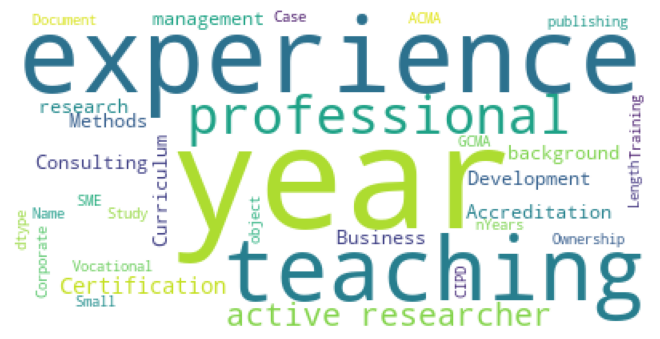

In [73]:
# Visualize the most frequent words

viz_word_frequency = WordCloud(background_color ='white')
viz_word_frequency.generate(str(df['Document Experience and Certifications']))
plt.imshow(viz_word_frequency)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

As we can see, the words _'year'_ occurs most frequently, followed by _'experience'_ and _'Certification'_. There are also mistakes like _'nYearsName'_ or irrelevant word like _'dtype'_. 

This tells us to prepare for human errors like spelling mistakes and completely irregular patterns in data. To handle this, let's use a Vectorizer.

In [74]:
# Using vectorizer to parse the text and extract relevant information

vectorizerCount = CountVectorizer(ngram_range=(1,1), lowercase=False, stop_words=['english','the','is'])       #ngram_range can be changes to 2 or 3 to find relevant combinations

unigram_data = vectorizerCount.fit_transform(df['Document Experience and Certifications'])
unigram_data.toarray()

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 1, 1, ..., 0, 2, 0],
       [0, 1, 0, ..., 1, 1, 0]])

In [75]:
word_counts = unigram_data.toarray().sum(axis=0)
word_freq_df = pd.DataFrame({'word': vectorizerCount.get_feature_names_out(), 'count': word_counts})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
word_freq_df

,word,count
565,years,305
460,experience,212
541,teaching,134
500,of,109
420,and,87
...,...,...
270,Linguistic,1
269,Licensed,1
268,License,1
266,Lean,1


This confirms our visualization earlier.

Since we know that there might be spelling mistakes, we will try to cover as many as we can by exploring this vocabulary created by Count Vectorizer.

In [76]:
# Now we see the variation of occurances of 3 words: 'years', 'experience' and 'certifications'

filtered_exp_df = word_freq_df[word_freq_df['word'].str.contains('exp|Exp')]

filtered_exp_df

,word,count
460,experience,212
178,Experience,38
180,Expirience,4
177,Exp,3
179,Expert,2
459,experiece,1
458,experianc,1


There are 7 variations of the word 'experience' due to human errors in the textual data.

Similarly, let's have a look at the other 2 words.

In [77]:
filtered_year_df = word_freq_df[word_freq_df['word'].str.contains('year|Year|Yrs|yrs')]
filtered_year_df

,word,count
565,years,305
409,Years,50
564,year,11
566,yrs,4
410,Yrs,2
35,2Year,1
3,12years,1
6,14years,1
555,uyears,1
39,3years,1


We can see most of the certificate names are captured in this dataframe. 

In [78]:
# Calculating total experince and whether the experience is accompanied by any certifications - assigning a boolean flag for existence of certifications

total_exp_arr = []
additional_certifications = []

def total_exp(record):
    if (df['Document Experience and Certifications'].str.contains('Exp|exp|Year|year|Yrs|yrs')).any():
         numbers_pattern = re.compile(r'\d+')
         numbers = re.findall(numbers_pattern, record)
         total_sum = sum(int(num) for num in numbers)
         total_exp_arr.append(total_sum)


In [79]:

for row in df['Document Experience and Certifications'] :    
     total_exp(row)

df['Total Experience'] = total_exp_arr


In [80]:
df.head()

,ID,Name,Location,Grade,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,Major Teaching Field,Document Experience and Certifications,Criteria,Total Experience
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,29-Aug-10,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master of Arts (International Affairs), Master of Business Administrat (Business Administration)","[BUS2403-Innovation&Entrepreneurship, BUS2003-BusinessandCommercialLaw, LSG2013-Globalization, Media&Soc, BUS1003-ManagementandLeadership]",Business Administration,"10+ Years Small Business Ownership, 10+ Years SME Consulting, 10+ Years Corporate/Vocational Business Training, 8 Years Teaching Experience",Industry & Teaching experience,38
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,19-Aug-99,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Management Accounting), Master of Science (Business Info. Technology)","[BUS4173-ManagerialAccountingII, BUS4916-IntegrativeIndustryProject, BUS4163-Taxation, BUS4133-ManagerialAccountingI]",Business,"years of teaching experience: 17 years of professional/management experience: 7 Professional Certification: GCMA, ACMA",Certification,24
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,08-Apr-07,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associate Diploma (Business & Management), Master of Business Administrat (Marketing), Bachelor of Commerce (Human Resources), Certificate (Applied Business)","[BUS3903-ContemporaryBusiness, BUS1303-Marketing]",Marketing and Strategic Management,Years of teaching experience: 15\nYears of professional/management experience: 3,Industry & Teaching experience,18
3,UNKNOWN,Sally Smith,London,FA,Faculty - Business,14-Aug-16,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters in Business Management)","[HRM, Organizationalbehaviour, StrategicMgt, projectmgt, Riskmgt]",HRM,6 years professional experience + 6 years teaching and active researcher,Researcher,12
4,UNKNOWN,Ned Shearer,London,Chair,Faculty - Business,14-Aug-16,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and International Business)","[MicroandMacroeconomics, Statistics, IntroductiontoBusiness]",Economics and International Business,1 year professional experience + 24 years teaching and active researcher. Curriculum Development and Accreditation background.,Researcher/Curriculum Development,25


In [81]:
df['University'] = df['University'].fillna('UNKNOWN')

<Axes: >

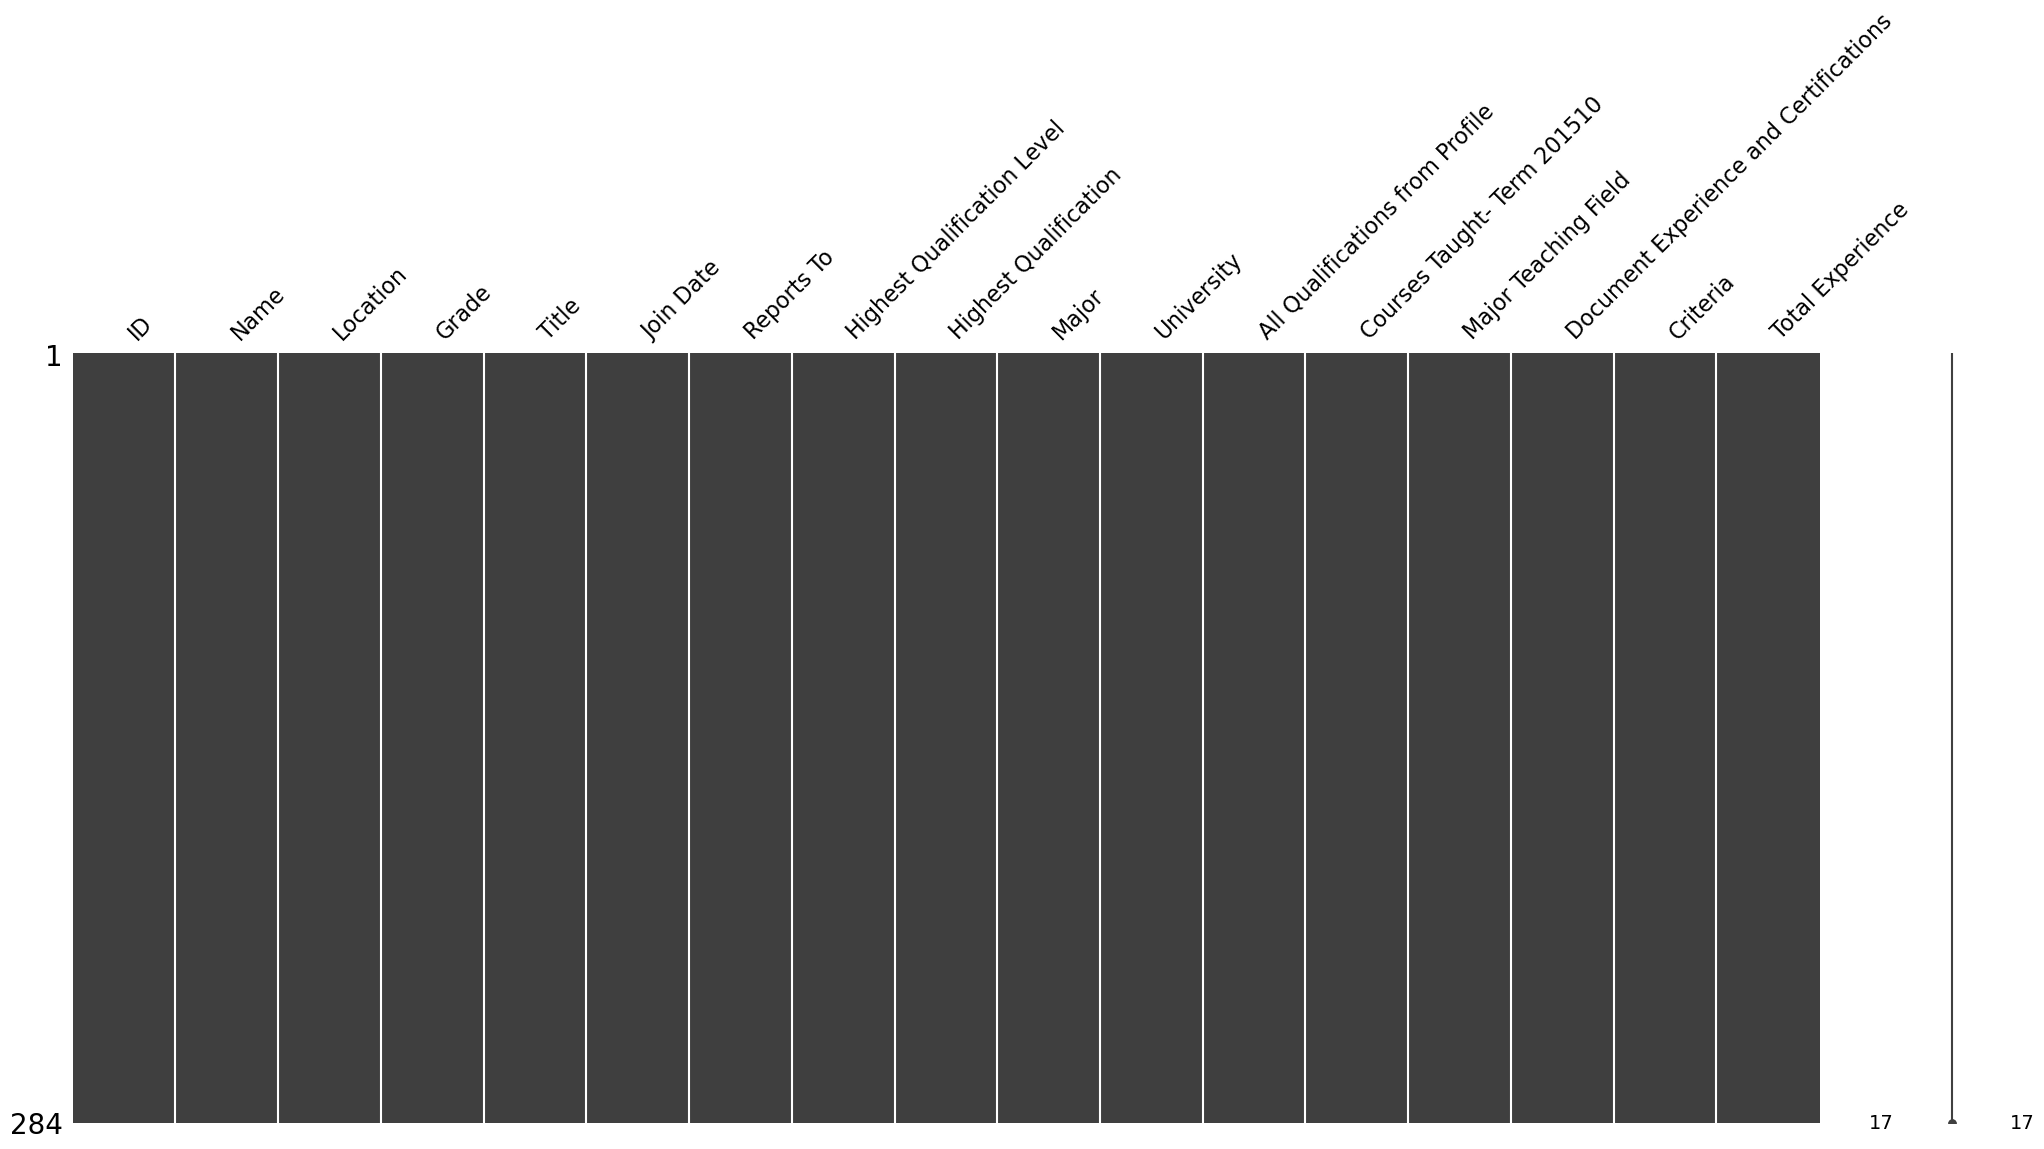

In [82]:
msno.matrix(df)

__References:__

ApX (no date) ’Strategy 2: Deleting Columns’. Available: https://apxml.com/courses/intro-data-cleaning-preprocessing/chapter-2-handling-missing-data/deleting-columns-missing-data. (Accessed: 22 September 2025)

Buckley, A.,Butler, K. (2017) ‘Best Practices for Dealing with Missing Data’. Available: https://www.esri.com/about/newsroom/arcuser/dealing-with-missing-data. (Accessed: 22 September 2025)

GG (2025) ‘Pandas DataFrame: Remove Constant Columns’. Available: https://www.geeksforgeeks.org/python/pandas-dataframe-remove-constant-columns/. (Accessed: 22 September 2025)

Jafari, R. (2022) Hands-on data preprocessing in Python : learn how to effectively prepare data for successful data analytics / Roy Jafari. Birmingham, UK: Packt Publishing.
